# Time Series Forecasting on Bitcoin Dataset

0. Naive Forecast
1. Moving Average
2. ARIMA
3. sktime
4. Tensorflow Decision Forests (Random forest, gradient boosting trees)
5. Facebook Kats
6. Linkedin Greykite

7. Dense Model
8. Same as 1
9. Same as 1
10. Conv1D
11. LSTM
12. Same as 1 but multivariate
13. N-BEATs Algorithm
14. Ensemble
15. Future Prediction model
16. Same as 1 but with turkey data introduced

In [4]:
import pandas as pd
df = pd.read_csv("/content/bitcoin_2010-07-17_2024-09-09.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-09-08,2024-09-09,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
1,2024-09-07,2024-09-08,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2,2024-09-06,2024-09-07,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
3,2024-09-05,2024-09-06,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
4,2024-09-04,2024-09-05,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [5]:
df.rename(columns={'Start':'Date'}, inplace = True)
df.drop(columns='End', inplace = True, axis=1)

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-09-08,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
1,2024-09-07,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2,2024-09-06,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
3,2024-09-05,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
4,2024-09-04,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5168 non-null   object 
 1   Open        5168 non-null   float64
 2   High        5168 non-null   float64
 3   Low         5168 non-null   float64
 4   Close       5168 non-null   float64
 5   Volume      5168 non-null   float64
 6   Market Cap  5168 non-null   float64
dtypes: float64(6), object(1)
memory usage: 282.8+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5168 non-null   datetime64[ns]
 1   Open        5168 non-null   float64       
 2   High        5168 non-null   float64       
 3   Low         5168 non-null   float64       
 4   Close       5168 non-null   float64       
 5   Volume      5168 non-null   float64       
 6   Market Cap  5168 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 282.8 KB


In [10]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2024-09-08,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
2024-09-07,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2024-09-06,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
2024-09-05,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
2024-09-04,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [11]:
df.sort_index(ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-07-17,0.0500,0.0500,0.0500,0.0500,0.0,170803.152488
2010-07-18,0.0858,0.0858,0.0858,0.0858,0.0,294746.595000
2010-07-19,0.0808,0.0808,0.0808,0.0808,0.0,277570.220000
2010-07-20,0.0747,0.0747,0.0747,0.0747,0.0,256710.178548
2010-07-21,0.0792,0.0792,0.0792,0.0792,0.0,274308.375000


In [12]:
len(df)

5168

In [15]:
bitcoin_prices = pd.DataFrame(df['Close']).rename(columns={'Close':'Price'})
bitcoin_prices.head()

,Price
Date,
2010-07-17,0.0500
2010-07-18,0.0858
2010-07-19,0.0808
2010-07-20,0.0747
2010-07-21,0.0792


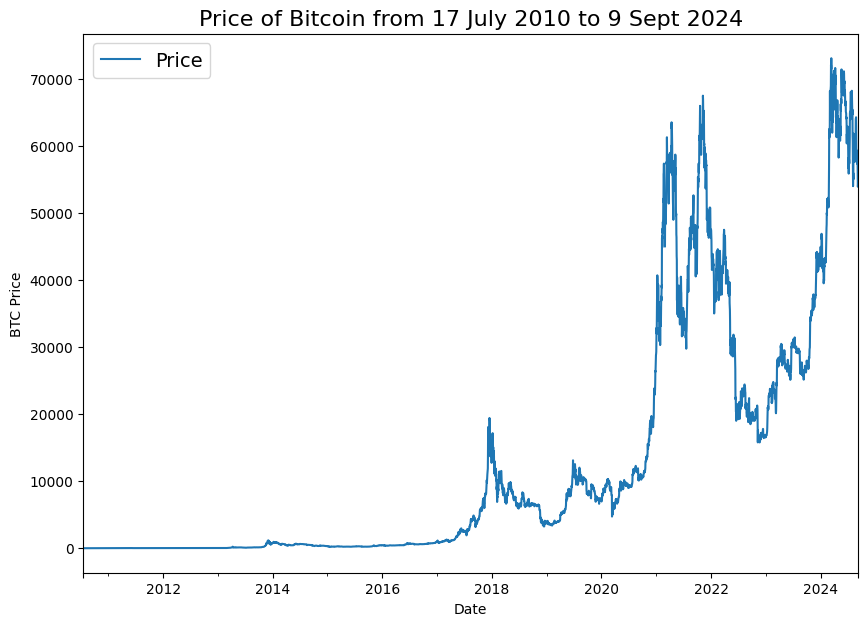

In [16]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title("Price of Bitcoin from 17 July 2010 to 9 Sept 2024", fontsize=16)
plt.legend(fontsize=14);

In [2]:
# Doing the same with python's inbuilt csv function
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/bitcoin_2010-07-17_2024-09-09.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[4]))

timesteps.reverse()
btc_price.reverse()
timesteps[:10], btc_price[:10]

([datetime.datetime(2010, 7, 18, 0, 0),
  datetime.datetime(2010, 7, 19, 0, 0),
  datetime.datetime(2010, 7, 20, 0, 0),
  datetime.datetime(2010, 7, 21, 0, 0),
  datetime.datetime(2010, 7, 22, 0, 0),
  datetime.datetime(2010, 7, 23, 0, 0),
  datetime.datetime(2010, 7, 24, 0, 0),
  datetime.datetime(2010, 7, 25, 0, 0),
  datetime.datetime(2010, 7, 26, 0, 0),
  datetime.datetime(2010, 7, 27, 0, 0)],
 [0.05, 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056])

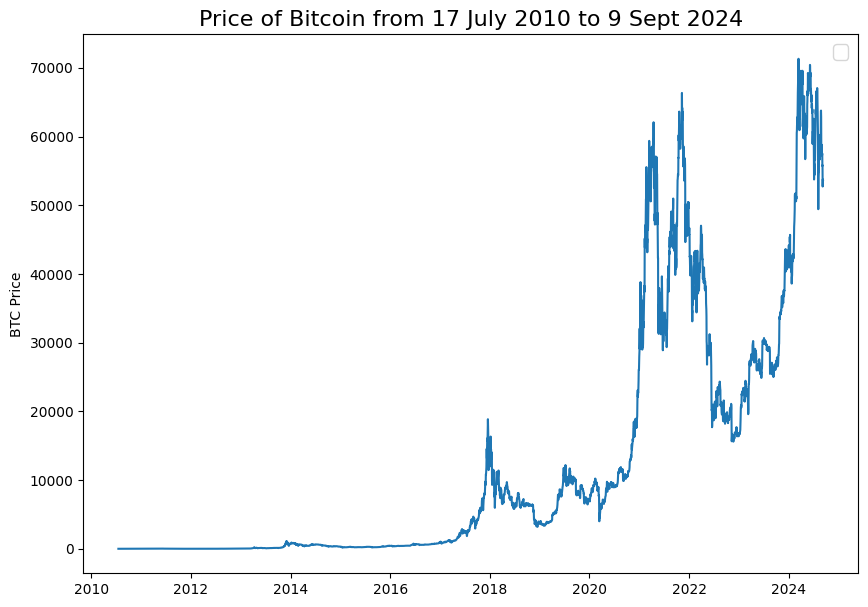

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 17 July 2010 to 9 Sept 2024", fontsize=16)
plt.ylabel('BTC Price')
plt.legend(fontsize=14);

In [19]:
split_size = int(0.8 * len(bitcoin_prices))
X_train, y_train = timesteps[:split_size], btc_price[:split_size]
X_test, y_test = timesteps[split_size:], btc_price[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(4134, 1034, 4134, 1034)

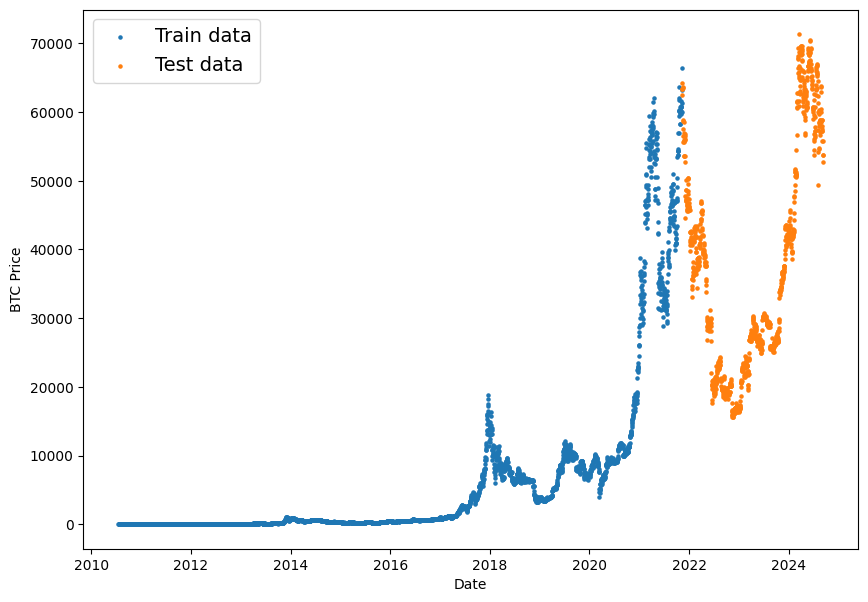

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [22]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

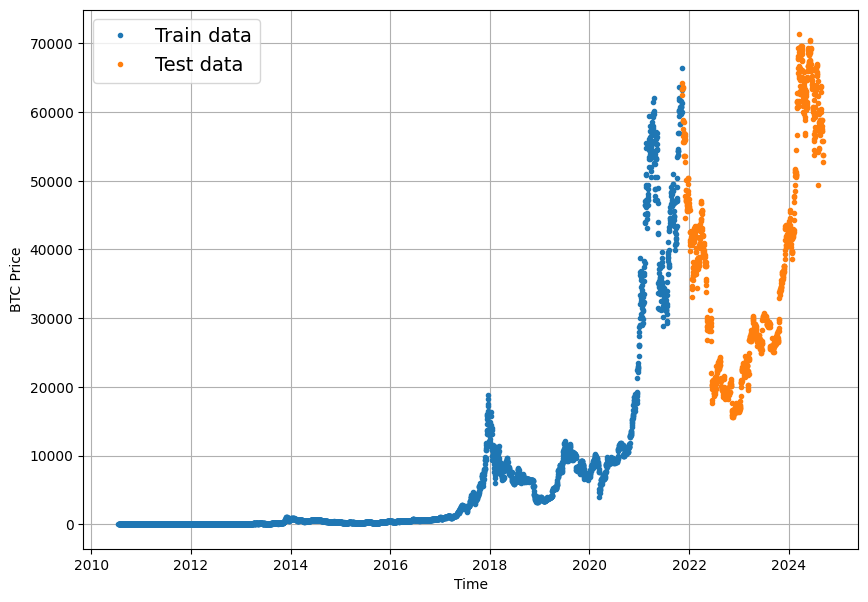

In [23]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [24]:
# Model 0 : Naive Forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

([63347.5012,
  64198.97340220052,
  62434.00795821887,
  63412.85980752298,
  63622.5547,
  63539.59326805828,
  58904.4092,
  58758.3434,
  56542.1638,
  55653.0576],
 [58821.98,
  57944.0,
  58800.05,
  57268.97,
  57297.96,
  57544.01,
  55737.91,
  55835.0,
  52738.0,
  53767.28])

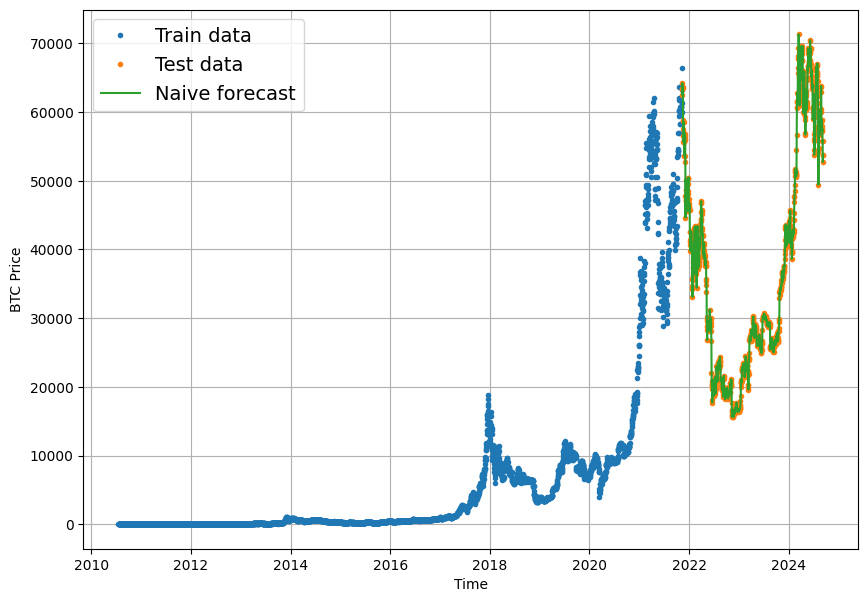

In [26]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values = naive_forecast, format="-", label="Naive forecast")

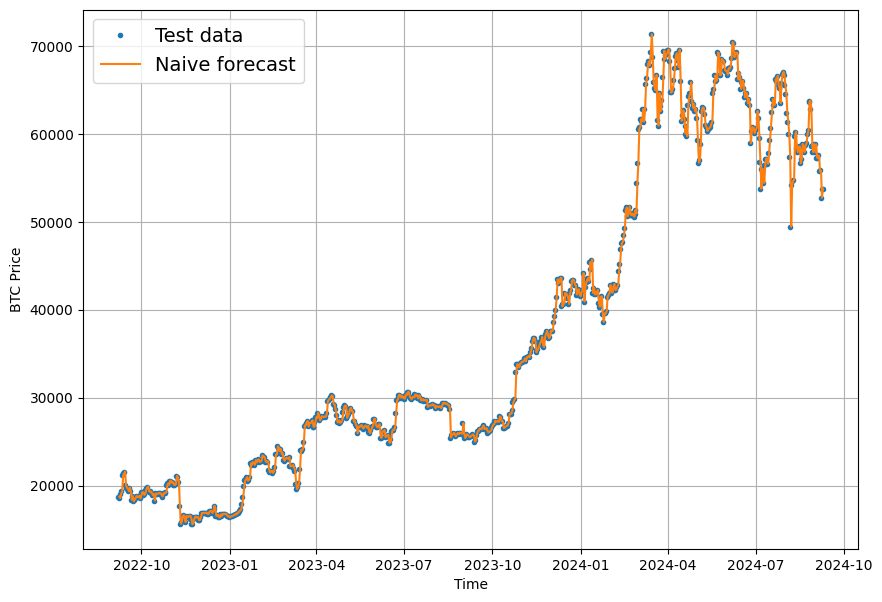

In [28]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast")

In [29]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season


In [36]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.MAE(y_true, y_pred)
  mse = tf.keras.metrics.MSE(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [37]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 684.85785,
 'mse': 1295928.8,
 'rmse': 1138.3887,
 'mape': 1.8192456,
 'mase': 1.0002357}

In [47]:
# Windowing dataset
HORIZON = 1
WINDOW_SIZE = 7

In [38]:
def get_labelled_windows(x, horizon = 1):
  return x[:, :-horizon], x[:, -horizon:]

In [40]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(tf.squeeze(test_window).numpy())
print(tf.squeeze(test_label).numpy())

[1 2 3 4 5 6 7]
8


In [55]:
def make_windows(x, window_size=7, horizon=1):
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    start_indices = np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    window_indexes = window_step + start_indices
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

In [61]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizer.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_window, test_labels),
            collbacks = [create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

In [ ]:
model_2 = tf.keras.models.load_model("model_experiment/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [ ]:
# Model 3 : Dense (Window = 30, horizon = 7)
HORIZON = 7
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizer.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

In [ ]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

In [ ]:
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_preds[:5]

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.MAE(y_true, y_pred)
  mse = tf.keras.metrics.MSE(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
# Model 4 : Conv1D
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
train_windows[0].shape

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

In [ ]:
# Model 5: RNN (LSTM)
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, ouputs = output, name = "model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizer.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results